In [1]:
from sklearn.datasets import make_classification

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2)

(100, 2)


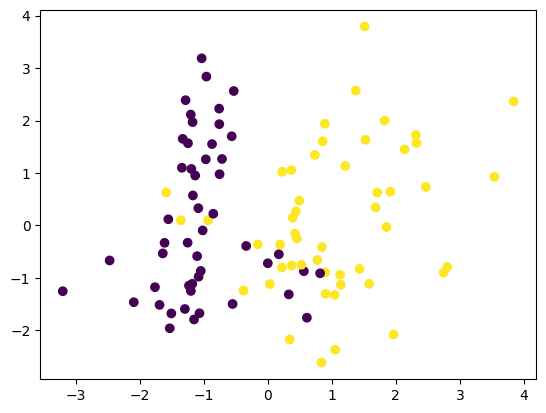

In [2]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0],X[:,1],c=y+3)
print(X.shape)

In [3]:
from sklearn.svm import LinearSVC

model = LinearSVC(C=1)
model.fit(X,y)

y_hat = model.predict(X)



/home/bgauzere/.pyenv/versions/3.10.13/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


In [4]:
from sklearn.metrics import accuracy_score
accuracy_score(y,y_hat)

0.89

In [5]:
import numpy as np
np.sum(y==y_hat)/len(y)


0.89

In [6]:
print(model.coef_, model.intercept_)

[[ 0.7875572  -0.01115309]] [0.08923766]


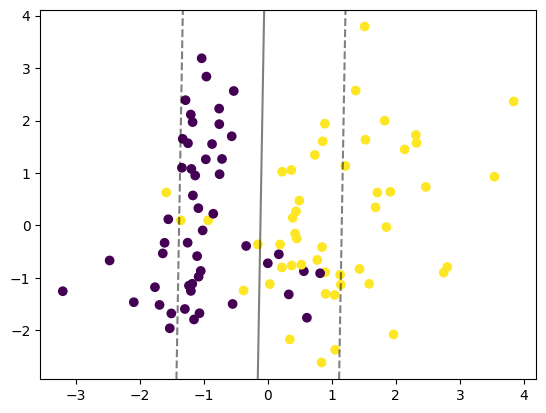

In [7]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0],X[:,1],c=y)

ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = model.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])


# with dual

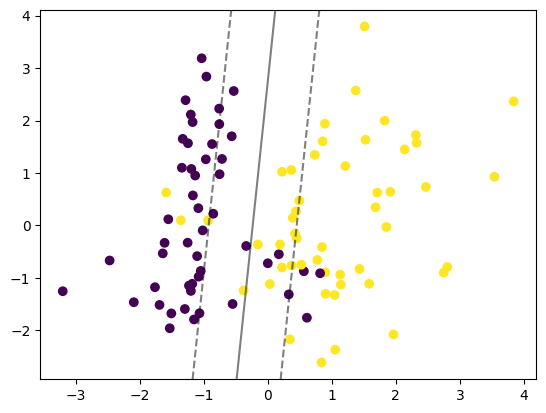

In [8]:
from sklearn.svm import SVC

model = SVC(kernel='linear',C=1)
model.fit(X,y)

y_hat = model.predict(X)
from sklearn.metrics import accuracy_score
accuracy_score(y,y_hat)
import matplotlib.pyplot as plt
plt.scatter(X[:,0],X[:,1],c=y)

ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = model.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])

In [9]:
model.dual_coef_

array([[-1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -0.69149222,
        -1.        , -0.64398499, -1.        , -1.        , -1.        ,
         0.33547721,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ]])

In [10]:
accuracy_score(y,y_hat)

0.9

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(X,y)
for C in [.001,0.1, 1, 10,100]:
    model = SVC(kernel='linear',C=C)
    model.fit(X_train,y_train)
    y_hat = model.predict(X_test)
    print(f"{C} : {accuracy_score(y_test,y_hat)}")
    
    

0.001 : 0.48
0.1 : 1.0
1 : 1.0
10 : 1.0
100 : 1.0


In [12]:
from sklearn.datasets import load_iris
X,y =load_iris(return_X_y=True)
print(X.shape)
X=X[y>0,:]
y=y[y>0]   
    

(150, 4)


In [13]:
from sklearn.model_selection import GridSearchCV
params={'C':np.logspace(-3,3,10)}
model = SVC(kernel='linear')
clf = GridSearchCV(model,params)
scores = []
for i in range(10):
    X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=.5)
    clf.fit(X_train,y_train)
    scores.append(accuracy_score(y_test, clf.predict(X_test)))

print(np.mean(scores))
print(np.std(scores))

0.9480000000000001
0.028565713714171388


In [14]:
from sklearn.datasets import load_digits
X,y =load_digits(n_class=10,return_X_y=True)
print(X.shape)
print(y)

(1797, 64)
[0 1 2 ... 8 9 8]


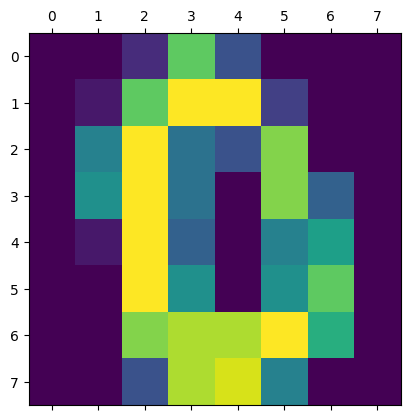

In [15]:
#plt.gray()
import matplotlib.pyplot as plt
import numpy as np
plt.matshow(np.reshape(X[150,:], (8,8)))

In [16]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

params={'C':np.logspace(-3,3,10)}
print(params)
model = SVC(kernel='linear')
clf = GridSearchCV(model,params)
scores = []
#split between train and test (and never use test to fit (hyper)parameters)
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=.5)
#learn and cross valid on X_train (gridsearchcv split X_train into X_train and X_valid 5 times)
clf.fit(X_train,y_train)
#Then, evaluate our best model according to gridsearchcv on test set
# our true performance
print(accuracy_score(y_test,clf.predict(X_test)))


{'C': array([1.00000000e-03, 4.64158883e-03, 2.15443469e-02, 1.00000000e-01,
       4.64158883e-01, 2.15443469e+00, 1.00000000e+01, 4.64158883e+01,
       2.15443469e+02, 1.00000000e+03])}
0.9744160177975528


In [17]:
clf.cv_results_

{'mean_fit_time': array([0.00650578, 0.00621066, 0.00625134, 0.00616288, 0.00615659,
        0.0064187 , 0.00615997, 0.00619764, 0.00615458, 0.00618439]),
 'std_fit_time': array([1.92265946e-04, 1.54358942e-04, 1.27912934e-04, 9.76713363e-05,
        3.65708299e-05, 4.89401951e-04, 3.52590046e-05, 1.29717359e-04,
        9.28913053e-05, 1.06392768e-04]),
 'mean_score_time': array([0.00187416, 0.00164709, 0.00162525, 0.00161614, 0.00162249,
        0.00188866, 0.00159278, 0.00161834, 0.00160103, 0.00159888]),
 'std_score_time': array([9.61360239e-05, 6.52966813e-05, 7.99771774e-05, 7.34028197e-05,
        1.25633190e-04, 5.38234610e-04, 9.08322345e-05, 6.83032238e-05,
        4.44839236e-05, 6.33580765e-05]),
 'param_C': masked_array(data=[0.001, 0.004641588833612777, 0.021544346900318832, 0.1,
                    0.46415888336127775, 2.154434690031882, 10.0,
                    46.41588833612773, 215.44346900318823, 1000.0],
              mask=[False, False, False, False, False, False,

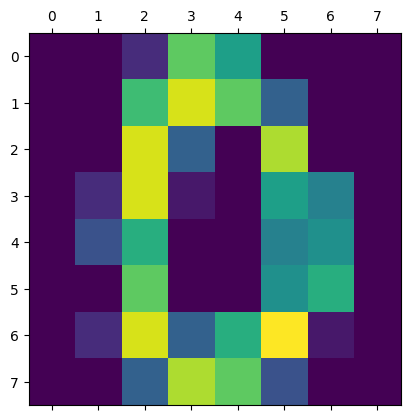

In [18]:
plt.matshow(np.reshape(X[130,:],(8,8)))

In [19]:
clf.predict([X[130,:]])

array([0])

# Figures pour la version non linéaire

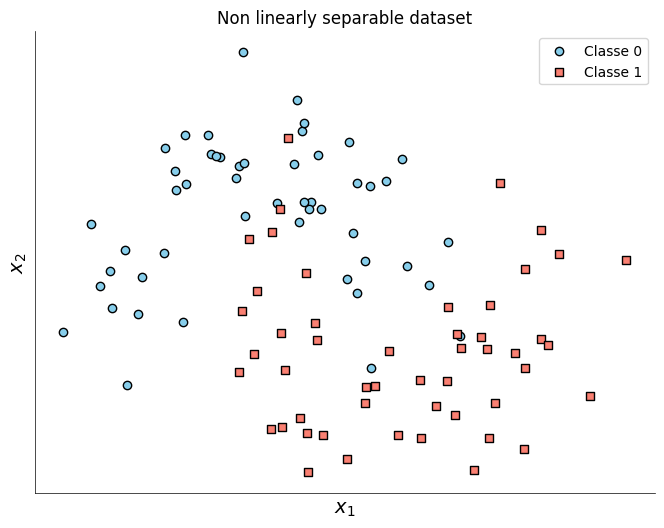

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons

# Générer un dataset non linéairement séparable
X, y = make_moons(n_samples=100, noise=0.25, random_state=42)

# Tracer le dataset avec un rendu moderne
plt.figure(figsize=(8, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], c='skyblue', marker='o', label='Classe 0', edgecolors='k', linewidths=1)
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], c='salmon', marker='s', label='Classe 1', edgecolors='k', linewidths=1)
plt.title("Non linearly separable dataset")
plt.xlabel(r'$x_1$', fontsize=14)
plt.ylabel(r'$x_2$', fontsize=14)
plt.legend()
plt.grid(False)
plt.xticks([])
plt.yticks([])
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_linewidth(0.5)
plt.gca().spines['left'].set_linewidth(0.5)
plt.gca().xaxis.set_tick_params(width=0.5)
plt.gca().yaxis.set_tick_params(width=0.5)
plt.show()


In [14]:
def plot_svm( X,y,model, titre):
    # Tracer la fonction de décision et les marges avec un rendu moderne
    fig, ax = plt.subplots(figsize=(10, 8))

    # Créer une grille pour la visualisation
    x_min, x_max = X[:, 0].min() , X[:, 0].max()
    y_min, y_max = X[:, 1].min() , X[:, 1].max()
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
    xy = np.c_[xx.ravel(), yy.ravel()]
    Z = model.predict(xy)
    Z = Z.reshape(xx.shape)
    
    Z = model.decision_function(xy).reshape(xx.shape)
    
    # plot decision boundary and margins
    ax.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.75,
               linestyles=['--', '-', '--'])
    
    ax.scatter(X[y == 0][:, 0], X[y == 0][:, 1], c='skyblue', marker='o', label='Classe 0', edgecolors='k', linewidths=1)
    ax.scatter(X[y == 1][:, 0], X[y == 1][:, 1], c='salmon', marker='s', label='Classe 1', edgecolors='k', linewidths=1)
    ax.set_title(titre)
    ax.set_xlabel(r'$x_1$', fontsize=14)
    ax.set_ylabel(r'$x_2$', fontsize=14)
    ax.legend()
    ax.grid(False)
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_linewidth(0.5)
    ax.spines['left'].set_linewidth(0.5)
    fig.tight_layout()
    return fig
    

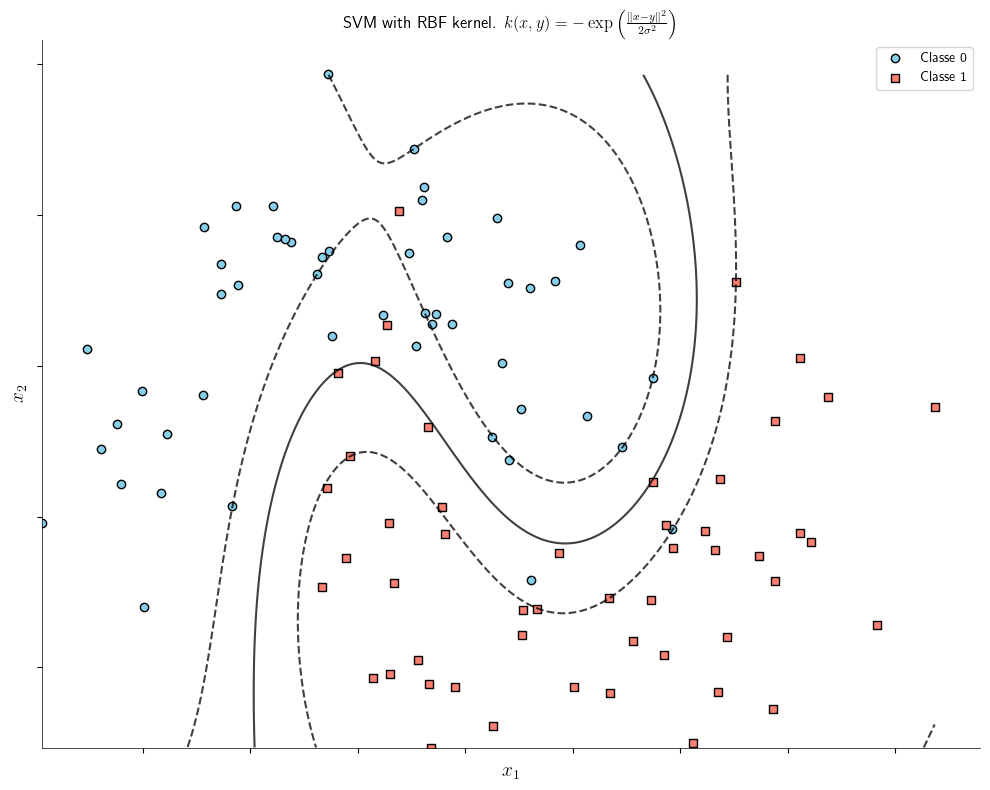

In [30]:
from sklearn.svm import SVC
svm = SVC(kernel='rbf', C=10)
svm.fit(X, y)
import matplotlib
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.preamble'] = r'\usepackage{amsmath} \usepackage{amsfonts} \usepackage{amssymb}'

fig_svm = plot_svm(X,y,svm,r"SVM with RBF kernel. $k(x,y) = -\exp{\left(\frac{\|x-y\|^2}{2 \sigma ^2}\right)}$")
fig_svm.savefig("svm_rbf.svg")

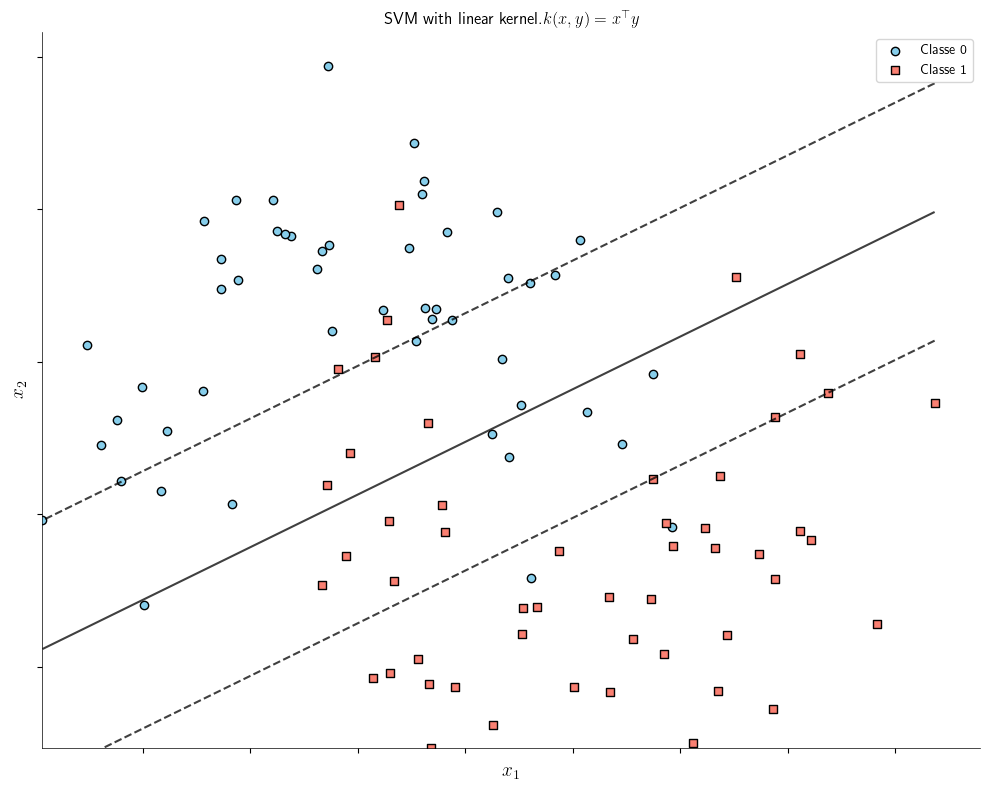

In [31]:

svm = SVC(kernel='linear', C=10)
svm.fit(X, y)

fig_svm =plot_svm(X,y,svm,r"SVM with linear kernel.$k(x,y) = x^\top y$")
fig_svm.savefig("svm_lineaire.svg")

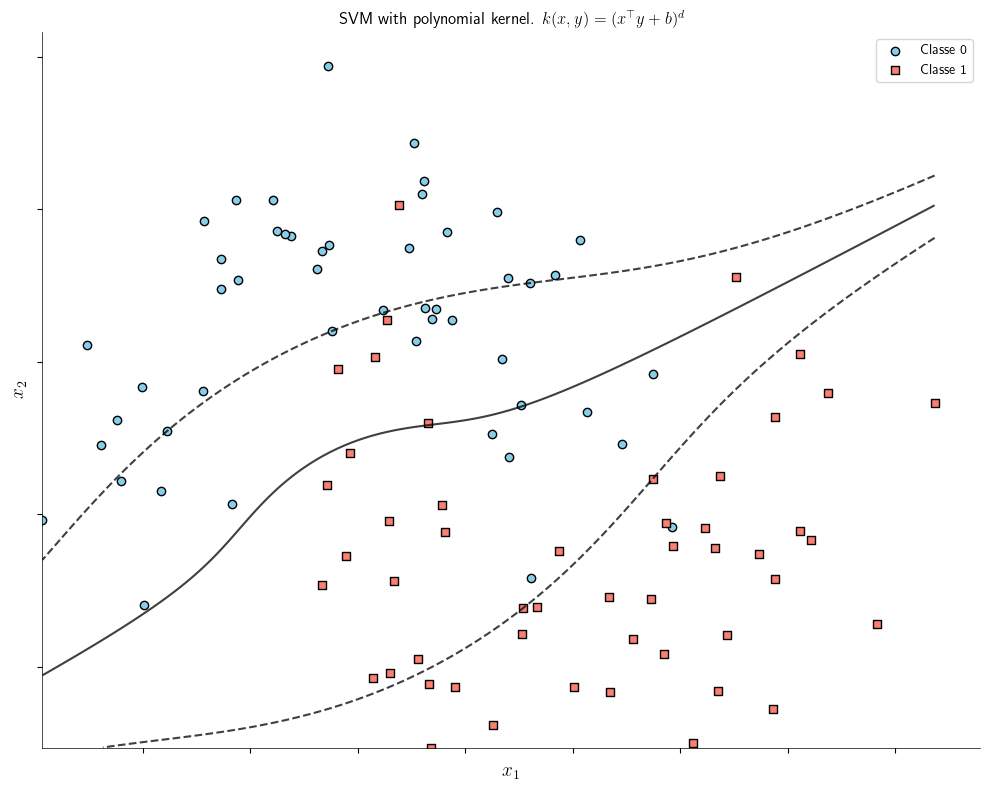

In [33]:

svm = SVC(kernel='poly', C=100)
svm.fit(X, y)

fig_svm =plot_svm(X,y,svm,r"SVM with polynomial kernel. $k(x,y) = (x^\top y + b)^d$")
fig_svm.savefig("svm_poly.svg")

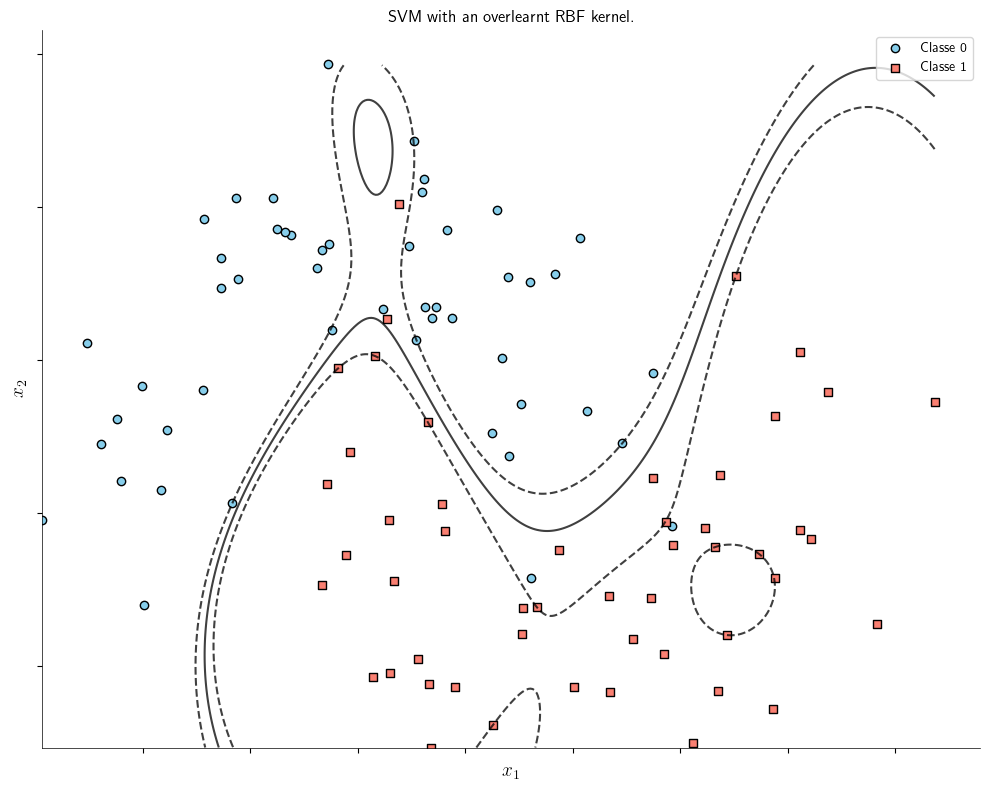

In [34]:

svm = SVC(kernel='rbf', C=1000)
svm.fit(X, y)

fig_svm =plot_svm(X,y,svm,"SVM with an overlearnt RBF kernel.")
fig_svm.savefig("svm_rbf_overlearning.svg")